
Tamaño imagen 1: (600, 600, 3) pix




<Figure size 432x288 with 0 Axes>

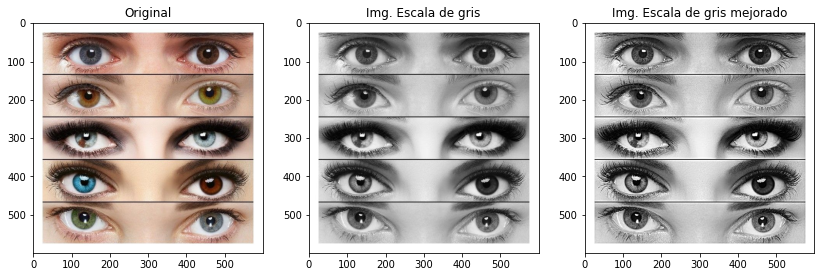

In [ ]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from scipy.ndimage.filters import median_filter
# Importamos librerías para distancia euclidiana
from scipy.spatial import distance
# Importamos librerías para manejo de tiempo
import time



#imagen en color
img1 = cv.imread('eyes.jpg')
imgRGB = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

############################################
gaussian_img = cv.GaussianBlur(gray, (0,0),2.2)
unsharp_image = cv.addWeighted(gray, 2.0, gaussian_img, -1.0, 0)
############################################

#unsharp_image=cv.multiply(unsharp_image,1.7)
#unsharp_image=cv.add(unsharp_image,50) 

# Dimensión de la imagen
print('\nTamaño imagen 1: {} pix'.format(img1.shape))
print('\n')

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(imgRGB)
ax1.set_title('Original')

ax2=plt.subplot(132)
ax2.imshow(gray,cmap="gray")
ax2.set_title('Img. Escala de gris')


ax2=plt.subplot(133)
ax2.imshow(unsharp_image,cmap="gray")
ax2.set_title('Img. Escala de gris mejorado')

fig.tight_layout()    
plt.show()



<Figure size 432x288 with 0 Axes>

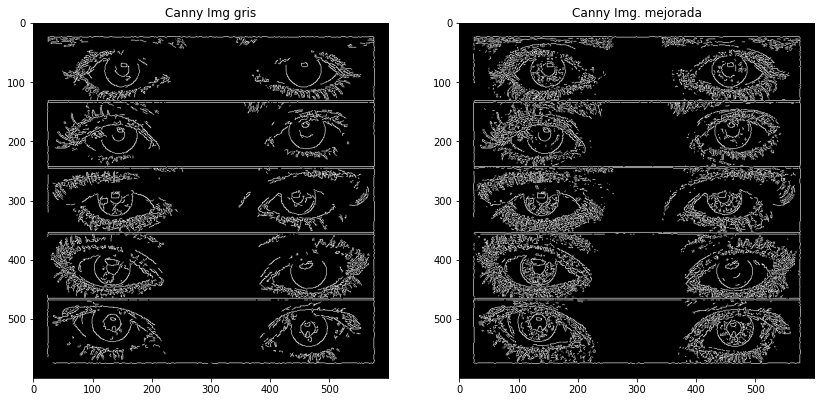

In [ ]:


bordes1 = cv.Canny(gray,150,255) ## aplicamos el filtro canny para la deteccion de bordes,
##seleccionamos un umbral minimo de 135 y un maximo de 255
bordes2 = cv.Canny(unsharp_image,190,255) ## aplicamos el filtro canny para la deteccion de bordes,
##seleccionamos un umbral minimo de 135 y un maximo de 255

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(121)
ax1.imshow(bordes1,cmap="gray")
ax1.set_title('Canny Img gris')

ax2=plt.subplot(122)
ax2.imshow(bordes2,cmap="gray")
ax2.set_title('Canny Img. mejorada')

fig.tight_layout()    
plt.show()

<Figure size 432x288 with 0 Axes>

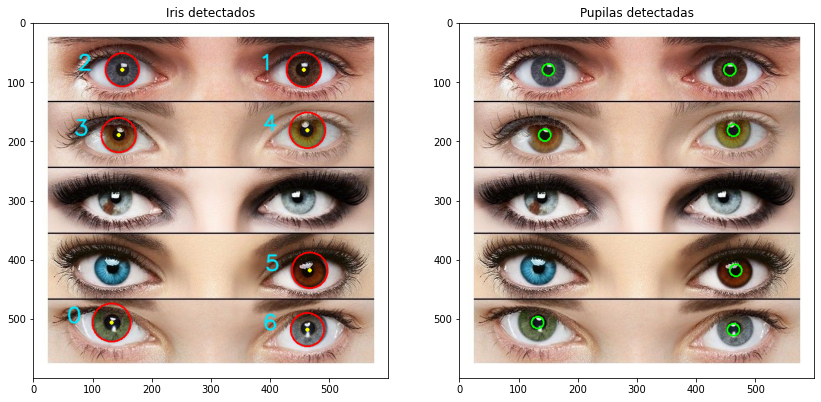

In [ ]:
#detectamos el iris de cada ojo

imgRGB2=imgRGB.copy()
centros_iris=[]
########################### IRIS ##############################################
#circles1 = cv.HoughCircles(bordes2,cv.HOUGH_GRADIENT,1,100,param1=31,param2=31,minRadius=0,maxRadius=41)
circles1 = cv.HoughCircles(bordes2,cv.HOUGH_GRADIENT,1,100,param1=31,param2=33,minRadius=0,maxRadius=41)
circles = circles1[0,:,:]#Extraer como bidimensional
circles = np.uint16(np.around(circles))#Redondeo, redondeo
idx=0
for i in circles[:]:
  #print(i)
  
  if(i[2]>20):# el iris tiene un radio mayor a 20px
    centros_iris.append(i)
    cv.circle(imgRGB,(i[0],i[1]),i[2],(255,0,0),2)#
    cv.circle(imgRGB,(i[0],i[1]),2,(255,255,0),2)# 
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(imgRGB,str(idx),(i[0]-75,i[1]), font,1.2,( 0,230,255),2,cv.LINE_AA)
    #dibujamos las pupilas
    cv.circle(imgRGB2,(i[0],i[1]),10,(0,255,0),2)#
    idx=idx+1
    


# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(121)
ax1.imshow(imgRGB)
ax1.set_title('Iris detectados')

ax2=plt.subplot(122)
ax2.imshow(imgRGB2)
ax2.set_title('Pupilas detectadas')

fig.tight_layout()    
plt.show()


 ================= DISTANCIAS ===========================

(456, 80) (150, 80)
Distancia [2]------[1]:  306.0
(462, 182) (144, 190)
Distancia [3]------[4]:  65528.77160454025
(462, 518) (132, 506)
Distancia [0]------[6]:  330.21810973960834




<Figure size 432x288 with 0 Axes>

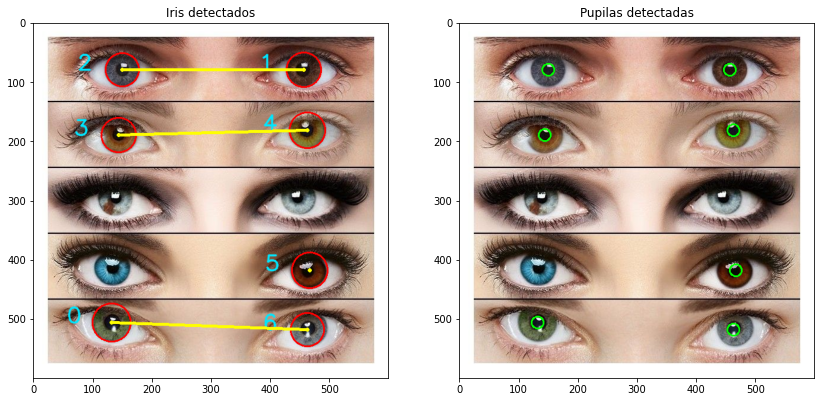

In [ ]:
# se dibujan las rectas y se encuentra las distancias
print("\n ================= DISTANCIAS ===========================\n")
#----linea del ojo 2 al 1----------------------------
arreglo=centros_iris[1]
arreglo2=centros_iris[2]
cv.line(imgRGB,(arreglo[0],arreglo[1]),(arreglo2[0],arreglo2[1]),(255,255,0),3,cv.LINE_8)
a = (arreglo[0],arreglo[1])
b = (arreglo2[0],arreglo2[1])
print(a,b)
d=distance.euclidean(a,b)
print("Distancia [2]------[1]: ",d)
#----linea del ojo 3 al 4----------------------------
arreglo=centros_iris[3]
arreglo2=centros_iris[4]
cv.line(imgRGB,(arreglo[0],arreglo[1]),(arreglo2[0],arreglo2[1]),(255,255,0),3,cv.LINE_8)
a = (arreglo2[0],arreglo2[1])
b = (arreglo[0],arreglo[1])
print(a,b)
d=distance.euclidean(a,b)
print("Distancia [3]------[4]: ",d)
#----linea del ojo 0 al 6----------------------------
arreglo=centros_iris[0]
arreglo2=centros_iris[6]
cv.line(imgRGB,(arreglo[0],arreglo[1]),(arreglo2[0],arreglo2[1]),(255,255,0),3,cv.LINE_8)
a = (arreglo2[0],arreglo2[1])
b = (arreglo[0],arreglo[1])
print(a,b)
d=distance.euclidean(a,b)
print("Distancia [0]------[6]: ",d)
print("\n =======================================================\n")

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(121)
ax1.imshow(imgRGB)
ax1.set_title('Iris detectados')

ax2=plt.subplot(122)
ax2.imshow(imgRGB2)
ax2.set_title('Pupilas detectadas')

fig.tight_layout()    
plt.show()